<a href="https://colab.research.google.com/github/obeabi/DeepLearning/blob/master/CombinedPowerPlant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
## Title : Combined Cycle Power Plant Data Set
### Date : 2020-09-05
### Objective: Neural network model for predicting energy output from a power plant where the features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

## Install Libraries

In [1]:
# install libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
# %matplotlib inline

print("libraies installed successfully!")
print("The version of tensorflow is", tf.__version__)


libraies installed successfully!
The version of tensorflow is 2.3.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preprocessing & Exploratory Analysis

In [2]:
# load dataset as a datframe
dataset = pd.read_excel('PowerPlant.xlsx')
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Check for missing values and shape both before and after treating missing values
print("The original shape of the dataframe is:", dataset.shape)

print("The number of missing values in the dataframe is/are:", dataset.isnull().sum().sum())

The original shape of the dataframe is: (9568, 5)
The number of missing values in the dataframe is/are: 0


In [4]:
# Check data types for dataset
dataset.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [5]:
# Statistical Summary
dataset.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
# Examine correlation matrix
dataset.corr(method = 'spearman')

,AT,V,AP,RH,PE
AT,1.000000,0.850620,-0.518790,-0.542706,-0.944412
V,0.850620,1.000000,-0.426129,-0.304938,-0.883702
AP,-0.518790,-0.426129,1.000000,0.086776,0.542531
RH,-0.542706,-0.304938,0.086776,1.000000,0.389640
PE,-0.944412,-0.883702,0.542531,0.389640,1.000000


The skewness value of the data in AT column is  -0.13639304947492412
The kurtosis value of the data in AT column is  -1.037549192309245


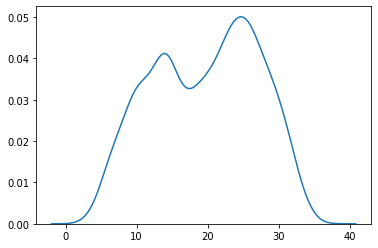

In [22]:
# Visual exploratory analysis: KDE plot for AT vs PE
ax = sns.kdeplot( dataset.iloc[:,0].values )
print("The skewness value of the data in AT column is ", dataset['AT'].skew())
print("The kurtosis value of the data in AT column is ", dataset['AT'].kurtosis())

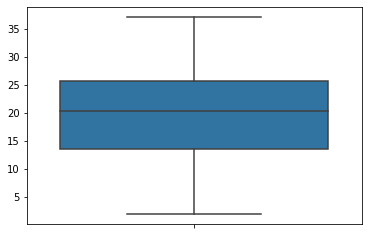

In [13]:
# Visual exploratory analysis: KDE plot for AT vs PE
ax = sns.boxplot( dataset.iloc[:,0].values, orient= "v" )

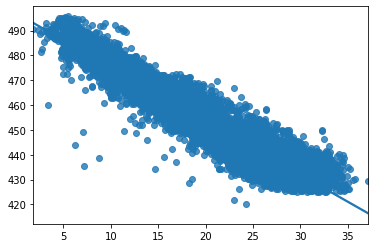

In [8]:
# Visual exploratory analysis: Regression plot for AT vs PE
sns.regplot(x = dataset.iloc[:,0].values, y = dataset.iloc[:,-1].values)
plt.show()

The skewness value of the V column is  0.1985210113667618
The kurtosis value of the V column is  -1.4443366772319608


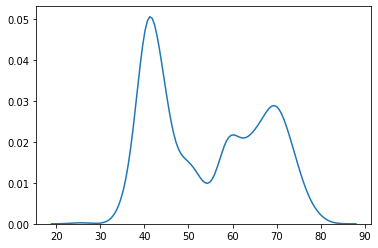

In [20]:
# Visual exploratory analysis: KDE plot for V vs PE
ax = sns.kdeplot( dataset.iloc[:,1].values )
print("The skewness value of the data in V column is ", dataset['V'].skew())
print("The kurtosis value of the data in V column is ", dataset['V'].kurtosis())

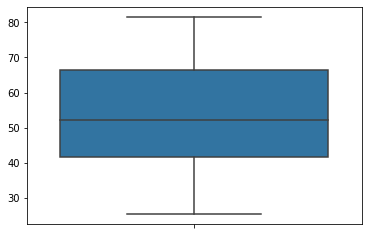

In [15]:
# Visual exploratory analysis: KDE plot for V vs PE
ax = sns.boxplot( dataset.iloc[:,1].values, orient= "v" )

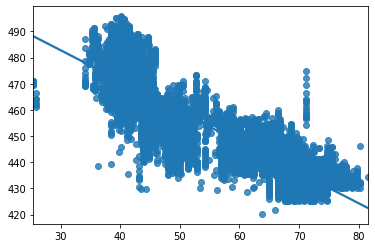

In [16]:
# Visual exploratory analysis: Regression plot for V vs PE
sns.regplot(x = dataset.iloc[:,1].values, y = dataset.iloc[:,-1].values)
plt.show()

The skewness value of the data in AT column is  0.26544469358258616
The kurtosis value of the data in AT column is  0.09423719530331276


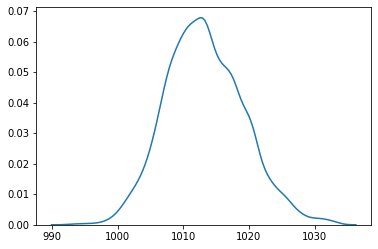

In [23]:
# Visual exploratory analysis: KDE plot for AP vs PE
ax = sns.kdeplot( dataset.iloc[:,2].values )
print("The skewness value of the data in AT column is ", dataset['AP'].skew())
print("The kurtosis value of the data in AT column is ", dataset['AP'].kurtosis())

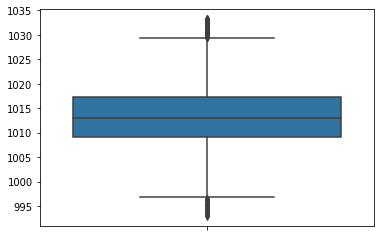

In [24]:
# Visual exploratory analysis: KDE plot for AP vs PE
ax = sns.boxplot( dataset.iloc[:,2].values, orient= "v" )

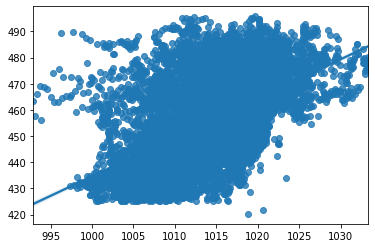

In [25]:
# Visual exploratory analysis: Regression plot for AP vs PE
sns.regplot(x = dataset.iloc[:,2].values, y = dataset.iloc[:,-1].values)
plt.show()

The skewness value of the data in AT column is  -0.4318387491833358
The kurtosis value of the data in AT column is  -0.4445263744874066


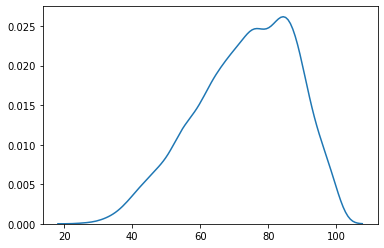

In [26]:
# Visual exploratory analysis: KDE plot for RH vs PE
ax = sns.kdeplot( dataset.iloc[:,3].values )
print("The skewness value of the data in AT column is ", dataset['RH'].skew())
print("The kurtosis value of the data in AT column is ", dataset['RH'].kurtosis())

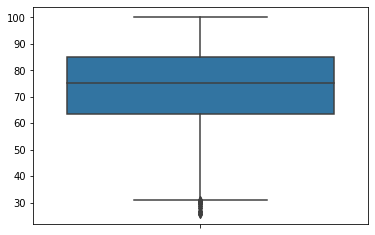

In [27]:
# Visual exploratory analysis: KDE plot for RH vs PE
ax = sns.boxplot( dataset.iloc[:,3].values, orient= "v" )

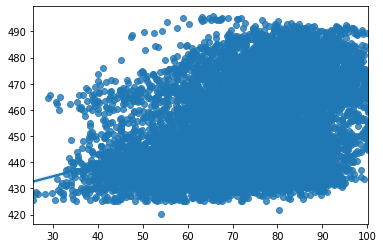

In [28]:
# Visual exploratory analysis: Regression plot for RH vs PE
sns.regplot(x = dataset.iloc[:,3].values, y = dataset.iloc[:,-1].values)
plt.show()

In [29]:
# Split dataset into dependent and independent varaibles
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X.shape)
print(y.shape)

(9568, 4)
(9568,)


In [30]:
# print the features matrix X
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [31]:
# print the target variable y
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


### Split dataframe into training and test set

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


## Step 2: Build the ANN

In [33]:
# Initialize ANN network
ann = tf.keras.models.Sequential()
ann

### Add input and first hidden layer

In [34]:
# Establish the first hidden layer of the NN with n_H1 neurons
n_H1 = 6
ann.add(tf.keras.layers.Dense(units = n_H1, activation= 'relu'))

### Add the Second hidden layer

In [35]:
# Establish the second hidden layer of the NN
n_H2 = 6
ann.add(tf.keras.layers.Dense( units= n_H2, activation= 'relu'))

### Add the output layer

In [36]:
ann.add(tf.keras.layers.Dense(units= 1))

## Step 3: Training the ANN

In [38]:
# Compile the NN model
ann.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [41]:
# Train the NN model
ann.fit(x = X_train, y = y_train, batch_size = 2**5, epochs = 100)

Epoch 1/100
240/240 [==============================] - 0s 929us/step - loss: 184802.2969
Epoch 2/100
240/240 [==============================] - 0s 920us/step - loss: 22652.4473
Epoch 3/100
240/240 [==============================] - 0s 873us/step - loss: 440.7000
Epoch 4/100
240/240 [==============================] - 0s 868us/step - loss: 430.3493
Epoch 5/100
240/240 [==============================] - 0s 947us/step - loss: 417.7527
Epoch 6/100
240/240 [==============================] - 0s 898us/step - loss: 403.5829
Epoch 7/100
240/240 [==============================] - 0s 880us/step - loss: 387.7775
Epoch 8/100
240/240 [==============================] - 0s 860us/step - loss: 370.4504
Epoch 9/100
240/240 [==============================] - 0s 865us/step - loss: 351.3015
Epoch 10/100
240/240 [==============================] - 0s 839us/step - loss: 331.6931
Epoch 11/100
240/240 [==============================] - 0s 883us/step - loss: 310.7060
Epoch 12/100
240/240 [=========================

## Step 4: Prediction with the ANN

In [42]:
# prediction from NN
y_pred = ann.predict(x= X_test)
np.printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[431.23699951 431.23      ]
 [462.28701782 460.01      ]
 [465.78060913 461.14      ]
 ...
 [473.03585815 473.26      ]
 [439.78823853 438.        ]
 [459.02120972 463.28      ]]


In [43]:
# Model evaluation on test set
from sklearn.metrics import r2_score
print("The r_squared for the test set is: ", r2_score(y_pred,y_test))

The r_squared for the test set is:  0.9111799762568482
